<a href="https://colab.research.google.com/github/TanjinaHasan15/Data_Mining/blob/main/adaboost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implement logistic Regression and Adaboost Classification on same
# data set . Compare both algorithm with visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
iris = load_iris()
X = iris.data[:, :2] # Use only first 2 features for easy plotting
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [7]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [8]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_ada = accuracy_score(y_test, y_pred_ada)

print("Logistic Regression Accuracy:", acc_lr)
print("AdaBoost Accuracy:", acc_ada)

Logistic Regression Accuracy: 0.8222222222222222
AdaBoost Accuracy: 0.8


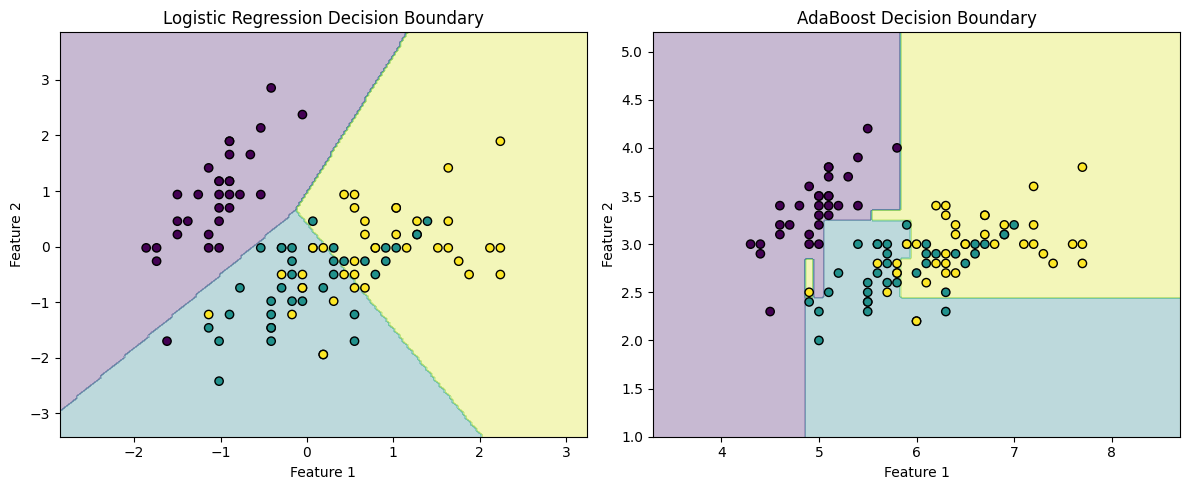

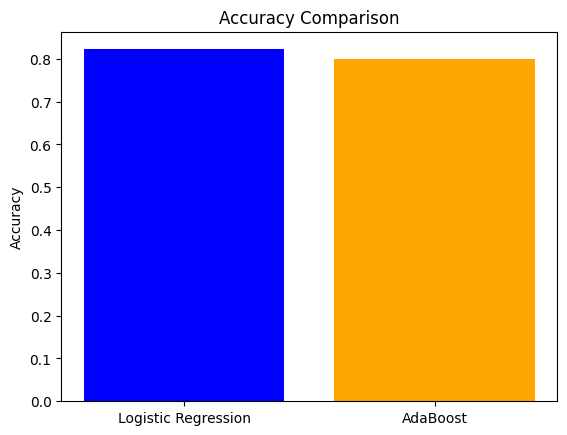

In [10]:
def plot_boundary(model, X, y_data, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y_data, edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


plt.figure(figsize=(12, 5))

# Logistic Regression plot
plt.subplot(1, 2, 1)
plot_boundary(log_reg, X_train_scaled, y_train, "Logistic Regression Decision Boundary")

# AdaBoost plot
plt.subplot(1, 2, 2)
plot_boundary(ada, X_train, y_train, "AdaBoost Decision Boundary")

plt.tight_layout()
plt.show()


# Accuracy Bar Chart

plt.bar(["Logistic Regression", "AdaBoost"], [acc_lr, acc_ada],
        color=["blue", "orange"])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()